# Your task for today

1. Like all classes, this one is optional, especially if you've already trained a classification CNN in PyTorch. But if you want practice, then:
1. Read, run, and fill this entire notebook **in your own pace**.
1. **Understand every line and annotation**.
1. Ask me ANY questions. "Dumb" questions are absolutely fine, don't be shy. "What's going on?", "Where are we now in the course?" are OK.
1. Outside of the classes, I encourage you to ask any questions in Slack channels.

Prepare for your homework (to be released today) will ask to train a classification network from scratch. This seminar won't be enough to get 100% homework score, you'll need to google.

<br><br><br><br><br><br><br><br><br><br><br><br><br><br>

# Deep learning for computer vision


This notebook builds and trains convolutional networks for image classification (recognition).

<font color="red">
This is just an example. It's too basic and doesn't always follow best practices. In fact, you are expected to google. Always search for other reference code (GitHub repositories for recent deep learning papers; popular Web tutorials; official PyTorch examples; etc.) and learn your own PyTorch coding style from it.
</font>

Example alternatives for this notebook:
* https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html
* https://www.run.ai/guides/deep-learning-for-computer-vision/pytorch-cnn
* https://docs.microsoft.com/en-us/windows/ai/windows-ml/tutorials/pytorch-train-model
* https://github.com/bearpaw/pytorch-classification/blob/master/imagenet.py
* https://github.com/Lornatang/ResNet-PyTorch/blob/master/examples/imagenet/main.py
* ...

## Convolutions

**Linear** layer: $X$ (`batch_size x n_input_features`) $\rightarrow$ Linear($X$, $W$, $b$) (`batch_size x n_output_channels`)

**Conv2d** layer: $X$ (`batch_size x n_input_channels x H x W`) $\rightarrow$ Conv2d($X$, $W$, $b$) (`batch_size x n_output_channels x H_out x W_out`)

Example for a 1-channel image:

![Credits: https://stackoverflow.com/questions/52067833/how-to-plot-an-animated-matrix-in-matplotlib](https://i.stack.imgur.com/uEoXw.gif)


In practice, convolution is applied to multi-channel tensors (e.g., RGB image is a 3-channel tensor: `3 x H x W`). Say we transform an RGB image.

* input: $X$ (`n_images_in_minibatch=10 x n_input_channels=3 x H=7 x W=7`)
* **"kernel"**: $W$ (`n_output_channels=2 x n_input_channels=3 x H_kernel=3 x W_kernel=3`) -- learnable parameters
* output: $\text{Conv2d}(X, W)$ (`n_images_in_minibatch=10 x n_output_channels=2 x H_out=5 x W_out=5` &mdash; if no padding is used)
<br/><br/>
<br/><br/>

<center>
<img src="https://drive.google.com/uc?id=1mKm-qNYkem8PCYl_MVKGNCVz06UMPP_5" width=700></center>

<sub>Original picture credits: [link](https://mc.ai/a-comprehensive-introduction-to-different-types-of-convolutions-in-deep-learning/)</sub>

<!-- ![Credits: [CS231n, Stanford](https://cs231n.github.io/convolutional-networks/#case)](https://drive.google.com/uc?id=1rw6N1kUFYpzU3D5044u-kitsrTI69Gxj) -->
<!-- <sub>Picture credits: [link](https://cs231n.github.io/convolutional-networks/#case)</sub> -->

<br/><br/>
Convolution can be 1D, 2D, 3D, etc. The principle is the same: a small kernel sliding over feature axes ($H$, $W$ in 2D case) and calculating scalar product with values of $X$ it falls upon.


In [ ]:
input: 10 x 32 x 123 x 456
(batch_size x num_channels x H x W)

convolution: 32 -> 64, 3 x 3, stride: 1 x 1, padding: "same"
output: 10 x 64 x 123 x 456

max pooling: 2 x 2, stride: 2 x 2
output: 10 x 64 x 61 x 228

**A simple question.** Conv2D with **zero padding of 3** from each side.
* input: $X$ (`n_images_in_minibatch=1 x n_input_channels=5 x H=8 x W=9`)
* kernel: $W$ (`n_output_channels=3 x n_input_channels=5 x H_kernel=5 x W_kernel=3`) -- learnable parameters
* output: $\text{Conv2d}(X, W)$ (`n_images_in_minibatch=? x n_output_channels=? x H_out=? x W_out=?`)

In [4]:
import torch
import torch.nn as nn

input_tensor = torch.randn(1, 5, 8, 9)

In [5]:
conv = nn.Conv2d(5, 3, kernel_size=(5, 3), padding=3)
output_tensor = conv(input_tensor)
output_tensor.shape

torch.Size([1, 3, 10, 13])

## Max pooling

<center>
<center>
<img src="https://www.researchgate.net/publication/333593451/figure/fig2/AS:765890261966848@1559613876098/Illustration-of-Max-Pooling-and-Average-Pooling-Figure-2-above-shows-an-example-of-max.pn" height="400"></center>

In [6]:
pool = nn.MaxPool2d(kernel_size=2)
output_tensor = pool(input_tensor)
output_tensor.shape

torch.Size([1, 5, 4, 4])

## Stride

![](https://csdl-images.computer.org/trans/si/2020/04/figures/ko1ab-2961602.gif)

In [7]:
# convolution, stride=2 --> downsample x 0.5
conv = nn.Conv2d(5, 3, kernel_size=(5, 3), padding=3, stride=2)
output_tensor = conv(input_tensor)
output_tensor.shape

torch.Size([1, 3, 5, 7])

In [8]:
# pooling, no stride --> no downsample
pool = nn.MaxPool2d(kernel_size=2, stride=1)
output_tensor = pool(input_tensor)
output_tensor.shape

torch.Size([1, 5, 7, 8])

## ConvNets

VGG

![](https://media.geeksforgeeks.org/wp-content/uploads/20200219152207/new41.jpg)

<sub>Picture credits: [GeeksforGeeks](https://www.geeksforgeeks.org/vgg-16-cnn-model/)</sub>

ResNet

<center>
<img src="https://neurohive.io/wp-content/uploads/2019/01/resnet-architecture-3.png" width=500></center>

<sub>Picture credits: [Neurohive](https://neurohive.io/ru/vidy-nejrosetej/resnet-34-50-101/)</sub>

Very large and nice longread about various ConvNets which existed 4 years ago (should be enough for your homework) and how to build them: https://github.com/mbadry1/DeepLearning.ai-Summary/tree/master/4-%20Convolutional%20Neural%20Networks

# CIFAR10 dataset
In this seminar we'll focus on the image recognition problem on CIFAR10 dataset:
* 60000 32x32 RGB images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.
* 10 different classes: ('airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [9]:
import torchvision
import torch
from torchvision import transforms

In [10]:
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                             download=True, transform=transforms.ToTensor())
val_dataset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                           download=True, transform=transforms.ToTensor())

Files already downloaded and verified
Files already downloaded and verified


## Image examples ##

In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
class_names = ('airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

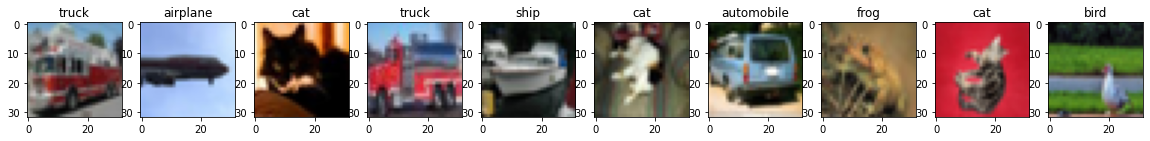

In [13]:
n_pics_to_show = 10
fig, ax = plt.subplots(1, n_pics_to_show, figsize=(20, 10))

for i in range(n_pics_to_show):
    rand_idx = np.random.randint(len(train_dataset))
    pic, label = train_dataset[rand_idx]
    
    pic_np = pic.data.numpy()
    pic_np = np.rollaxis(pic_np, 0, 3)    # 3xHxW to HxWx3
    ax[i].imshow(pic_np)
    ax[i].set_title(class_names[label])

# Building a network

Simple neural networks with layers applied on top of one another can be implemented as `torch.nn.Sequential` - just add a list of pre-built modules and let it train.

Skip the following cell, there are some functions for the train loop to make things easier.

In [15]:
# !pip install einops

from IPython import display
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from einops import rearrange


def compute_loss(logits, y_true, device='cuda:0'):
    y_true_on_device = y_true.to(device)
    return nn.functional.nll_loss(logits, y_true_on_device)
  

def compute_accuracy(logits, y_true, device='cuda:0'):
    y_pred = torch.argmax(logits, dim=1)
    y_true_on_device = y_true.to(device)
    accuracy = (y_pred == y_true_on_device).float().mean()
    return accuracy


def plot_loss_and_accuracy(loss_history, train_accuracy, val_accuracy, clear_output=True):
    if clear_output:
        display.clear_output(wait=True)
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    if loss_history:
        ax[0].semilogy(loss_history)
        ax[0].set_title('Training loss')
        ax[0].set_xlabel('# batches processed')
        ax[0].set_ylabel('loss value')
    
    if len(train_accuracy) > 0:
        ax[1].plot(train_accuracy, '*-b', label='train')
        ax[1].plot(val_accuracy, '*-r', label='test')
        ax[1].set_title('Accuracy')
        ax[1].legend()
        ax[1].set_xlabel('# epochs processed')
        ax[1].set_ylabel('accuracy value')
    
    plt.show()


# functions for tensorboard logging:
def images_to_probs(net, images):
    '''
    Generates predictions and corresponding probabilities from a trained
    network and a list of images
    '''
    output = net(images).cpu()
    # convert output probabilities to predicted class
    _, preds_tensor = torch.max(output, 1)
    preds = np.squeeze(preds_tensor.numpy())
    return preds, [torch.exp(el)[i].item() for i, el in zip(preds, output)]


def plot_classes_preds(net, images, labels):
    '''
    Generates matplotlib Figure using a trained network, along with images
    and labels from a batch, that shows the network's top prediction along
    with its probability, alongside the actual label, coloring this
    information based on whether the prediction was correct or not.
    Uses the "images_to_probs" function.
    '''
    classes = ('airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
    preds, probs = images_to_probs(net, images)
    # plot the images in the batch, along with predicted and true labels
    fig = plt.figure(figsize=(12, 12))
    for idx in np.arange(4):
        ax = fig.add_subplot(1, 4, idx+1, xticks=[], yticks=[])
        plt.imshow(rearrange(images[idx].cpu(), 'c h w -> h w c'))
        ax.set_title("{0}, {1:.1f}%\n(label: {2})".format(
            classes[preds[idx]],
            probs[idx] * 100.0,
            classes[labels[idx]]),
                    color=("green" if preds[idx]==labels[idx].item() else "red"))
    return fig

Let's create a mini-convolutional network with such architecture:
* 3x3 convolution with 128 output channels and _ReLU_ activation
* 2x2 max pooling
* Flatten
* Dense layer with 1024 outputs (neurons) and _ReLU_ activation
* 30% dropout
* Output dense layer.


__Convolutional layers__ in torch are just like all other layers, but with a specific set of parameters:

__`...`__

__`nn.Conv2d(in_channels=3, out_channels=128, kernel_size=3)) # convolution`__

__`nn.MaxPool2d(2) # max pooling 2x2`__

__`...`__


Once you're done (and compute_loss no longer raises errors), train it with __Adam__ optimizer with default params (feel free to modify the code above).

In [16]:
# a special module reshapes tensor from [batch, channel, w, h] to [batch, units]
class Flatten(nn.Module):
    def forward(self, input):
        return input.view(input.size(0), -1)

# or use nn.Flatten for torch >= 1.6.0

In [17]:
def make_model():
    model = nn.Sequential(
        nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, padding=1),  # (batch_size, 64, 32, 32)
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2),                                          # (batch_size, 64, 16, 16)
        Flatten(),                                                            # (batch_size, 64 * 16 * 16)
        nn.Linear(64 * 16 * 16, 1024),                                        # (batch_size, 1024)
        nn.Dropout(0.3),
        nn.Linear(1024, 10),                                                  # (batch_size, 10)
        nn.LogSoftmax(dim=1)
    )
    return model

In two previous seminars we had to write a function **iterate_minibatches**, which receives a full dataset and returns random batches from it. Pytorch already has a very efficient tool for this called **Dataloader**:

In [18]:
batch_size = 150  # number of samples processed in one iteration
train_batch_gen = torch.utils.data.DataLoader(train_dataset, 
                                              batch_size=batch_size,
                                              shuffle=True,
                                              num_workers=4)  # you should probably stick with 2 threads while using Colab

In [19]:
batch_size_val = 50
val_batch_gen = torch.utils.data.DataLoader(val_dataset, 
                                            batch_size=batch_size,
                                            shuffle=False,
                                            num_workers=4)  # you should probably stick with 2 threads while using Colab

In this task, a **training loop** is fully written for you below, you don't have to modify it. It's not the most important part right now, and you should be more or less familiar how to write a basic training loop, so let's not concentrate on it today.

In [20]:
import time
from tqdm import tqdm
from torch.utils.tensorboard import SummaryWriter

device = 'cuda:0'

def train(model, num_epochs=20, lr=0.01, exp_name='my_network'):
    writer = SummaryWriter(f'runs/{exp_name}')
    opt = torch.optim.Adam(model.parameters(), lr=lr)

    train_loss = []
    train_accuracy = []
    val_accuracy = []

    for epoch in range(num_epochs):
        start_time = time.time()
        model.train(True) # enable dropout / batch_norm training behavior

        train_accuracy_batch = []

        for batch_no, (X_batch, y_batch) in tqdm(enumerate(train_batch_gen), 
                                                 total=len(train_batch_gen)):
            model.zero_grad()
            # transferring batch to GPU
            X_batch_gpu = X_batch.to(device)
            # forward propagation through the model
            logits = model(X_batch_gpu)
            # calculating loss
            loss = compute_loss(logits, y_batch, device=device)
            # backward propagation through the model
            loss.backward()
            # optimizer step
            opt.step()

            train_loss.append(loss.item())

            accuracy = compute_accuracy(logits, y_batch, device=device)
            train_accuracy_batch.append(accuracy.item())

            if batch_no % 15 == 0:
                plot_loss_and_accuracy(train_loss, train_accuracy, val_accuracy, clear_output=True)
                print(f'epoch {epoch} training stage...')
                
                # sending loss to TensorBoard (don't think about this for now)
                writer.add_scalar('training loss',
                                  loss.item(),
                                  len(train_loss))

        train_accuracy_overall = np.mean(train_accuracy_batch) * 100
        train_accuracy.append(train_accuracy_overall.item())

        print(f'epoch {epoch} testing stage...')
        model.train(False) # disable dropout / use averages for batch_norm
        val_accuracy_batch = []
        with torch.no_grad():
            for X_batch, y_batch in tqdm(val_batch_gen):
                # transferring batch to GPU
                X_batch_gpu = X_batch.to(device)
                # forward propagation through the model
                logits = model(X_batch_gpu)

                # let's calculate the accuracy:
                accuracy = compute_accuracy(logits, y_batch, device=device)
                val_accuracy_batch.append(accuracy.item())
            
        # sending pictures to TensorBoard (don't think about this for now)
        writer.add_figure('predictions vs. actuals',
                          plot_classes_preds(model, X_batch_gpu, y_batch),
                          global_step=epoch)

        val_accuracy_overall = np.mean(val_accuracy_batch) * 100
        val_accuracy.append(val_accuracy_overall.item())

Let's train our network!

In [21]:
model = make_model()
model = model.to(device)    # transferring model to GPU

train(model, num_epochs=20, lr=0.01, exp_name='net1')
# to stop it press "Ctrl+M" then "I" in Colab, or the stop button on the left

 40%|████████████████████████████████▎                                               | 135/334 [00:05<00:08, 23.25it/s]


KeyboardInterrupt: 

Did we achieve the desired result? Is accuracy high? (reminder: CIFAR-10 has only 10 classes, thus random guessing will give 10% accuracy in average)

There is definitely something which we can improve in our training procedure, and it can be understood from the curves above. What is it?

In [22]:
model = make_model()
model = model.to(device)    # transferring model to GPU

train(model, num_epochs=20, lr=0.001, exp_name='net1_lower_LR')
# to stop it press "Ctrl+M" then "I" in Colab, or the stop button on the left

 76%|█████████████████████████████████████████████████████████████                   | 255/334 [00:10<00:03, 24.43it/s]


KeyboardInterrupt: 

Not bad. But [SoTA on CIFAR-10](https://paperswithcode.com/sota/image-classification-on-cifar-10) is 99.7%. Let's get a bit closer to SoTA. 

What else can be improved? What's really bad about the current network? Let's think of our model now and adapt some best practices.

In [24]:
# from torchsummary import summary
from torchinfo import summary

model = make_model()
summary(model.to(device), (3, 32, 32))

RuntimeError: Failed to run torchinfo. See above stack traces for more details. Executed layers up to: []

Let's try to implement our own Residual Block:

In [25]:
# residual block with no stride/downsample
class ResBlock(nn.Module):
    def __init__(self, in_channels, out_channels):        
        super(ResBlock, self).__init__()
        
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.activation = nn.ReLU(inplace=True)
        
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)
        
        if in_channels == out_channels:
            self.skip = nn.Identity()
        else:
            self.skip = nn.Sequential(nn.Conv2d(in_channels, out_channels, kernel_size=1, bias=False),
                                      nn.BatchNorm2d(out_channels))
        
        
    def forward(self, x):
        tmp = self.conv1(x)
        tmp = self.bn1(tmp)
        tmp = self.activation(tmp)
        
        tmp = self.conv2(tmp)
        tmp = self.bn2(tmp)
        
        out = tmp + self.skip(x)
        out = self.activation(out)
        return out

In [26]:
def make_model():
    model = nn.Sequential(
        nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1),
        nn.BatchNorm2d(32),
        nn.ReLU(),        
        nn.MaxPool2d(kernel_size=2),  # (batch_size, 32, 16, 16)
        
        ResBlock(32, 64),
        ResBlock(64, 64),
        nn.MaxPool2d(kernel_size=2),  # (batch_size, 64, 8, 8)
        
        ResBlock(64, 128),
        ResBlock(128, 128),
        nn.MaxPool2d(kernel_size=2),  # (batch_size, 128, 4, 4)
        
        ResBlock(128, 256),
        ResBlock(256, 256),
        nn.MaxPool2d(kernel_size=2),  # (batch_size, 256, 2, 2)
        
        Flatten(),
        
        nn.Linear(256 * 2 * 2, 10),
        nn.LogSoftmax(dim=1)
    )
    return model

In [27]:
from torchinfo import summary

model = make_model()
summary(model.to(device), (3, 32, 32))

RuntimeError: Failed to run torchinfo. See above stack traces for more details. Executed layers up to: []

In [28]:
model = make_model()
model = model.to(device)    # transferring model to GPU

train(model, num_epochs=20, lr=0.001, exp_name='residual_blocks')
# to stop it press "Ctrl+M" then "I" in Colab, or the stop button on the left

KeyboardInterrupt: 

### Data augmentation (fell free to fill the remaining cells)

Let's try augmenting our dataset with artificially made examples. 

We will give PyTorch some information about random transforms which can be made to our training images that keep them realistic and preserve their classes: flips, rotations, shifts, etc. This way, we get **an infinitely large dataset**!
https://pytorch.org/vision/stable/transforms.html

<img src="https://miro.medium.com/max/1000/1*MUOrB2-H5qkJop3Kl2oYmQ.png" width=600>

In [ ]:
my_transform = {
    'train': transforms.Compose(
        [
            # YOUR AUGMENTATIONS
            transforms.ToTensor(),
        ]),
    
    'test': transforms.Compose(
        [
            transforms.ToTensor(),
        ])
}

train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, 
                                             transform=my_transform['train'])
val_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, 
                                           transform=my_transform['test'])

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
class_names = ('airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [ ]:
n_pics_to_show = 10
fig, ax = plt.subplots(1, n_pics_to_show, figsize=(20, 10))

for i in range(n_pics_to_show):
    rand_idx = np.random.randint(len(train_dataset))
    pic, label = train_dataset[rand_idx]
    
    pic_np = pic.data.numpy()
    pic_np = np.rollaxis(pic_np, 0, 3)    # 3xHxW to HxWx3
    ax[i].imshow(pic_np)
    ax[i].set_title(class_names[label])

In [ ]:
batch_size = 150  # number of samples processed in one iteration
train_batch_gen = torch.utils.data.DataLoader(train_dataset, 
                                              batch_size=batch_size,
                                              shuffle=True,
                                              num_workers=4)

batch_size_val = 50
val_batch_gen = torch.utils.data.DataLoader(val_dataset, 
                                            batch_size=batch_size,
                                            shuffle=False,
                                            num_workers=4)

In [ ]:
def make_model():
    model = nn.Sequential(
       # YOUR CODE
    )
    return model

In [ ]:
model = make_model()
model = model.to(device)    # transferring model to GPU

train(model, num_epochs=20, lr=0.001, exp_name='residual_blocks_aug')
# to stop it press "Ctrl+M" then "I" in Colab, or the stop button on the left

Some popular convolutional networks are pre-built in PyTorch: for example, `torchvision.models.resnet18()`. Try them too:

https://pytorch.org/vision/stable/models.html

In practice, don't reinvent the wheel and use these unless your problem is very specific.